In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns

In [3]:
tea_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_ngr.csv", sep = ';', decimal=",")
tea_ngr

,H2_NGR,NGR with CCS,Pyrolysis
0,Lifetime (years),25.000,25.00
1,Interest rate (%),0.080,0.08
2,Amortisation factor,0.090,0.09
3,OPEX (% of CAPEX/a),0.030,0.05
4,Efficiency (%),0.690,0.52
5,Availability (%),0.950,0.95
6,Captured emissions (kgCO2/kgH2),8.700,NaN
7,Leaked emissions (kgCO2/kgH2),1.000,NaN
8,Carbon yield (kg/kg H2),3.000,NaN
9,Gas price ($/kWh),0.262,NaN


In [4]:
ngr_time_inputs = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/ngr_time_inputs.csv", sep=';', decimal=",")
ngr_time_inputs

,Years,Capex ($/kW ) NGR with CCS,Opex ($/kW/a) NGR with CCS,Capex ($/kW) Pyrolysis,Opex ($/kW/a) Pyrolysis,Gas prices ($/MWh) in the EU update,Gas prices ($/MWh) in the EU,CO2 price ($/t_co2) EU ETS,CO2 price ($/t_co2) Advanced economies (IEA),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2020,1627,48.81,NaN,NaN,24.890000,24.89,35.764486,28,NaN,35.00,90.290000
1,2021,1600,48.00,NaN,NaN,25.130000,25.13,81.747397,36,NaN,80.00,NaN
2,2022,1573,47.19,NaN,NaN,160.000000,25.37,90.290000,45,NaN,88.36,1.021842
3,2023,1547,46.41,NaN,NaN,150.000000,25.61,99.793135,52,NaN,97.66,NaN
4,2024,1520,45.60,NaN,NaN,110.000000,25.84,104.187057,60,NaN,101.96,NaN
5,2025,1493,44.79,NaN,NaN,114.843334,26.08,108.774446,67,NaN,NaN,1.044030
6,2026,1467,44.01,NaN,NaN,119.899922,26.32,113.563818,75,NaN,NaN,NaN
7,2027,1440,43.20,NaN,NaN,125.179152,26.56,118.564068,81,NaN,NaN,NaN
8,2028,1413,42.39,NaN,NaN,130.690829,26.80,123.784481,88,NaN,NaN,NaN
9,2029,1387,41.61,NaN,NaN,136.445187,27.04,129.234750,94,NaN,NaN,NaN


In [5]:
# Interest rate (WACC) in %
i_ngr = float(tea_ngr[tea_ngr.H2_NGR == 'Interest rate (%)']['NGR with CCS'].values)
i_ngr

0.08

In [6]:
# Economic lifetime of the plant in years
l_ngr = float(tea_ngr[tea_ngr.H2_NGR == 'Lifetime (years)']['NGR with CCS'].values)
l_ngr

25.0

In [7]:
# Calculate the amortisation factor alpha
alpha_ngr = (i_ngr * (1 + i_ngr) ** l_ngr) / (1 + i_ngr) ** (l_ngr - 1)
alpha_ngr
#round(alpha, 2)

0.08640000000000002

In [8]:
# Capital expenditures in $/kW in year y
capex_y = float(ngr_time_inputs[ngr_time_inputs.Years == 2020]['Capex ($/kW ) NGR with CCS'].values)
capex_y


1627.0

In [9]:
# Opex share  in % of Capex per year
opex_share = float(tea_ngr[tea_ngr.H2_NGR == 'OPEX (% of CAPEX/a)']['NGR with CCS'].values)
opex_share

0.03

In [10]:
# Operational expenditures in $/kW/a in year y
opex_y = opex_share * capex_y
opex_y

48.809999999999995

In [11]:
# Capacity factor as the availability of the plant in %
CF = float(tea_ngr[tea_ngr.H2_NGR == 'Availability (%)']['NGR with CCS'].values)
CF

0.95

In [12]:
# Natual gas price in year y in $/kWh
# maybe make projections on NG price development
#P_ng = tea_ngr.at[9,'NGR with CCS']
#P_ng = float(tea_ngr[tea_ngr.H2_NGR == 'Availability (%)']['NGR with CCS'].values)
P_ng = 0.02

In [13]:
# Plant efficiency in %
n = float(tea_ngr[tea_ngr.H2_NGR == 'Efficiency (%)']['NGR with CCS'].values)
n

0.69

In [14]:
#' Quantity of captured emissions in kg_CO2/kg_H2
Q_ce = float(tea_ngr[tea_ngr.H2_NGR == 'Captured emissions (kgCO2/kgH2)']['NGR with CCS'].values)
Q_ce

8.7

In [15]:
# Quantity of leaked emissions in kg_CO2/kg_H2
Q_ue = float(tea_ngr[tea_ngr.H2_NGR == 'Leaked emissions (kgCO2/kgH2)']['NGR with CCS'].values)
Q_ue

1.0

In [16]:
# P_ccs is the cost for transporting and storing CO2 in $/t_co2
P_ccs = float(tea_ngr[tea_ngr.H2_NGR == 'CO2 transport and storage cost ($/t)']['NGR with CCS'].values)
P_ccs

20.0

In [17]:
# Price for CO2 in year y in $/t_co2
P_co2 = float(tea_ngr[tea_ngr.H2_NGR == 'CO2 price for residual emissions ($/t)']['NGR with CCS'].values)
P_co2

150.0

In [18]:
# LHV of hydrogen is 33.33 kWh/kg
LHV_h2 = float(tea_ngr[tea_ngr.H2_NGR == 'LHV (kWh/kg H2)']['NGR with CCS'].values)
LHV_h2

33.33

In [19]:
# Calculate LCOH_ngr [$/kg_h2] in year y
lcoh_ngr_y = LHV_h2 * ((alpha_ngr * capex_y + opex_y) / (CF * 8760) + P_ng / n) + (Q_ce * P_ccs + Q_ue * P_co2) / 1000
lcoh_ngr_y

2.048573945707031

In [20]:
# Print result of LCOH from NGR calc.
print('The cost of hydrogen production from NG' + ' in year ' + str(round(lcoh_ngr_y, 2)) + ' [$/kg_h2]')


The cost of hydrogen production from NG in year 2.05 [$/kg_h2]


In [21]:
# Function that calculates LCOH for hydrogen production from NG
#def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng, n, Q_ce, P_ccs, Q_ue, P_co2, LHV_h2):
 #   return (LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng / n) + (Q_ce * P_ccs + Q_ue * P_co2) / 1000)

#lcoh_ngr_y = calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng, n, Q_ce, P_ccs, Q_ue, P_co2, LHV_h2)

# Print result of LCOH from NGR calc.
print('The cost of hydrogen production from NG' + ' in year ' + str(round(lcoh_ngr_y, 2)) + ' [$/kg_h2]')

The cost of hydrogen production from NG in year 2.05 [$/kg_h2]


In [22]:
# Definition of the cost calculation function for LCOH from NGR. Time relevant variables = capex, opex, P_ng, P_co2
def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng, n, Q_ce, P_ccs, Q_ue, P_co2, LHV_h2):

    result = float(LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng / 1000 * n) + (Q_ce * P_ccs + Q_ue * P_co2) / 1000)

    return result

In [23]:
# Calculation of LCOH from NGR for every year from 2030 to 2050.
years = np.arange(2020,2051)
result = pd.DataFrame(index=years, columns=['LCOH_NGR'])
result.index.name = 'Years'


for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_y = float(ngr_time_inputs[ngr_time_inputs.Years == year]['Capex ($/kW ) NGR with CCS'])
    opex_y = float(ngr_time_inputs[ngr_time_inputs.Years == year]['Opex ($/kW/a) NGR with CCS'])
    P_ng_y = float(ngr_time_inputs[ngr_time_inputs.Years == year]['Gas prices ($/MWh) in the EU update'])
    P_co2_y = float(ngr_time_inputs[ngr_time_inputs.Years == year]['CO2 price ($/t_co2) EU ETS'])

    # calculate lcoe of specific year
    result.LCOH_NGR.loc[year] = calculate_lcoh_ngr(alpha=alpha_ngr, capex_y=capex_y, opex_y=opex_y, CF=CF, P_ng=P_ng_y,
                                              n=n, Q_ce=Q_ce, P_ccs=P_ccs, Q_ue=Q_ue, P_co2=P_co2_y, LHV_h2=LHV_h2)

result

,LCOH_NGR
Years,
2020,1.540664
2021,1.57958
2022,4.677235
2023,4.44464
2024,3.516539
2025,3.619925
2026,3.728883
2027,3.842707
2028,3.962096


In [24]:
# Create csv file from results dataframe
import os
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LCOH_NGR.csv')
result.to_csv(output_file, sep = ';')

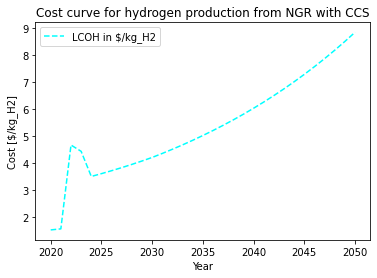

In [25]:
# Plot cost curve of hydrogen production from NGR with CCS
plt.plot(result, color = 'cyan', linestyle = 'dashed')
plt.title('Cost curve for hydrogen production from NGR with CCS')
plt.legend(['LCOH in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()